In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import random
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix

# Calculating evaluation metrics with 6 defect classification

In [3]:
crazing_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing"
inclusion_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion"
patch_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches"
pitted_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface"
rolled_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale"
scratch_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"

### Calculating evaluation metrics by training 240 images per defect

In [4]:
def load_dataset(directory):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  
        data.append(img_array)
        labels.append(0 if directory.endswith('crazing') else 1 if directory.endswith('inclusion') else 2 if directory.endswith('patches') else 3 if directory.endswith('pitted_surface') else 4 if directory.endswith('rolled-in_scale') else 5) 
    return np.array(data), np.array(labels)

In [5]:
crazing_data, crazing_labels = load_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_dataset(inclusion_dir)
patch_data, patch_labels = load_dataset(patch_dir)
pitted_data, pitted_labels = load_dataset(pitted_dir)
rolled_data, rolled_labels = load_dataset(rolled_dir)
scratch_data, scratch_labels = load_dataset(scratch_dir)

In [6]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

In [7]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [8]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)


data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 963ms/step - accuracy: 0.8161 - loss: 0.5224 - val_accuracy: 0.9965 - val_loss: 0.0086
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 833ms/step - accuracy: 0.9990 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 833ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 8.1391e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 826ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.7065e-04
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 830ms/step - accuracy: 1.0000 - loss: 7.1281e-04 - val_accuracy: 1.0000 - val_loss: 9.6801e-04
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 836ms/step - accuracy: 1.0000 - loss: 6.3694e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 889ms/step - accuracy: 1.0000 - loss: 5.6556e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 30s 834ms/step - accuracy: 1.0000 -

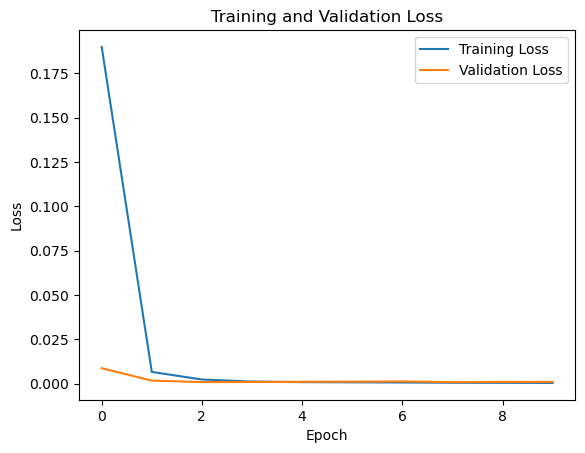

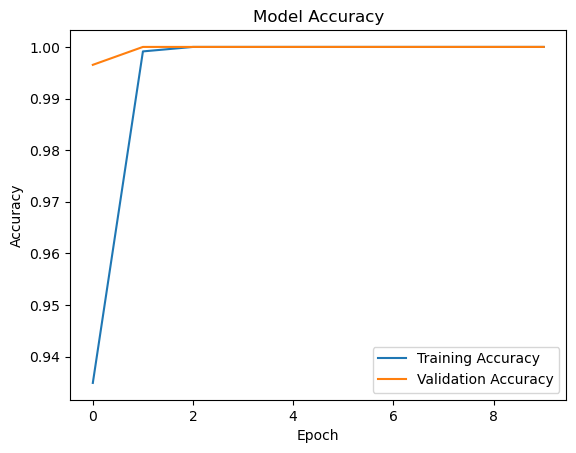

In [9]:
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### Predicting validation dataset

In [12]:
crazing_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/crazing"
inclusion_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/inclusion"
patch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/patches"
pitted_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/pitted_surface"
rolled_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/rolled-in_scale"
scratch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/scratches"

In [13]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    predicted_class_index = np.argmax(prediction)
    
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class


In [14]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []
    

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat



In [15]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training 240 images per defect:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy for training 240 images per defect:
Accuracy: 0.9722222222222222
Precision: 0.974030580075662
Recall: 0.9722222222222222
Confusion Matrix:
[[58  0  0  0  2  0]
 [ 0 56  0  0  0  4]
 [ 0  0 56  

### Calculating evaluation metrics by training 8 images per defect

In [16]:
def load_eight_dataset(directory, num_samples=8):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        if os.path.isfile(img_path):  # Check if it's a file
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0
            data.append(img_array)
            labels.append(0 if directory.endswith('crazing') else
                          1 if directory.endswith('inclusion') else
                          2 if directory.endswith('patches') else
                          3 if directory.endswith('pitted_surface') else
                          4 if directory.endswith('rolled-in_scale') else
                          5)
    
    # Randomly select num_samples images from the data
    if len(data) > num_samples:
        selected_indices = random.sample(range(len(data)), num_samples)
        data = [data[i] for i in selected_indices]
        labels = [labels[i] for i in selected_indices]
    
    return np.array(data), np.array(labels)

In [17]:
crazing_data, crazing_labels = load_eight_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_eight_dataset(inclusion_dir)
patch_data, patch_labels = load_eight_dataset(patch_dir)
pitted_data, pitted_labels = load_eight_dataset(pitted_dir)
rolled_data, rolled_labels = load_eight_dataset(rolled_dir)
scratch_data, scratch_labels = load_eight_dataset(scratch_dir)

In [18]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [20]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)


# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1398 - loss: 2.1093 - val_accuracy: 0.6000 - val_loss: 1.2235
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.8043 - loss: 0.5994 - val_accuracy: 0.7000 - val_loss: 1.5135
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.8531 - loss: 0.6682 - val_accuracy: 0.7000 - val_loss: 0.9131
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.8602 - loss: 0.4104 - val_accuracy: 1.0000 - val_loss: 0.1631
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 1.0000 - loss: 0.0481 - val_accuracy: 0.9000 - val_loss: 0.1977
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.9441 - loss: 0.1772 - val_accuracy: 0.9000 - val_loss: 0.2155
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.9265 - loss: 0.2056 - val_accuracy: 0.9000 - val_loss: 0.1724
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.9720 - loss: 0.0799 - val_accuracy: 0.9000 - val_loss: 0.

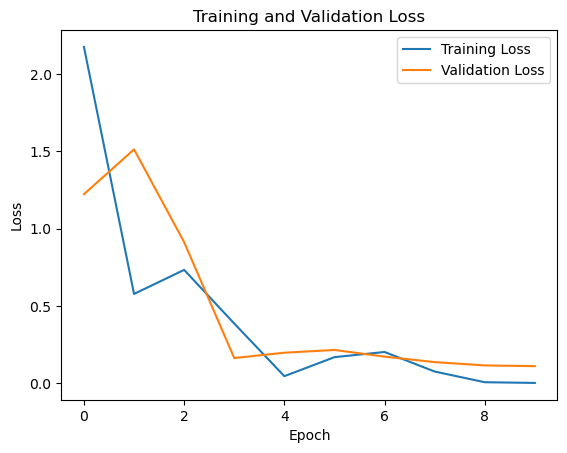

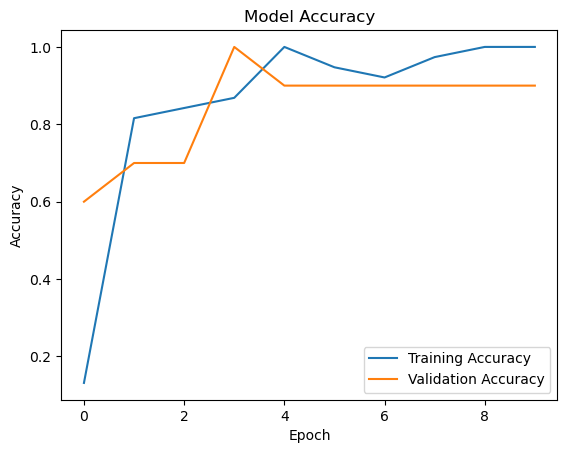

In [21]:
# Train the model and record training history
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [22]:
crazing_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/crazing"
inclusion_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/inclusion"
patch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/patches"
pitted_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/pitted_surface"
rolled_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/rolled-in_scale"
scratch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/scratches"

In [23]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class


In [24]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []
    

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat



In [25]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training 8 images:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy for training 8 images:
Accuracy: 0.7944444444444444
Precision: 0.7976238678553392
Recall: 0.7944444444444444
Confusion Matrix:
[[ 2  5  0 13 40  0]
 [ 0 59  0  0  0  1]
 [ 0  1 59  0  0  0]
 [ 

# Calculating evaluation metrics with Binary Classification

### With model trained on 240 images per defect

In [27]:
scratch_data, scratch_labels = load_dataset(scratch_dir)
patch_data, patch_labels = load_dataset(patch_dir)

In [28]:
data = np.concatenate((scratch_data, patch_data), axis=0)
labels = np.concatenate((scratch_labels, patch_labels), axis=0)

In [29]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [30]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)


# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7496 - loss: 0.6284 - val_accuracy: 1.0000 - val_loss: 6.2569e-05
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 849ms/step - accuracy: 1.0000 - loss: 6.8176e-05 - val_accuracy: 1.0000 - val_loss: 1.0247e-05
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 879ms/step - accuracy: 1.0000 - loss: 1.2933e-05 - val_accuracy: 1.0000 - val_loss: 5.3778e-06
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 868ms/step - accuracy: 1.0000 - loss: 1.0675e-05 - val_accuracy: 1.0000 - val_loss: 4.4218e-06
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 854ms/step - accuracy: 1.0000 - loss: 4.8960e-06 - val_accuracy: 1.0000 - val_loss: 4.2293e-06
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 845ms/step - accuracy: 1.0000 - loss: 5.1776e-06 - val_accuracy: 1.0000 - val_loss: 3.9785e-06
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 849ms/step - accuracy: 1.0000 - loss: 4.7388e-06 - val_accuracy: 1.0000 - val_loss: 3.8245e-06
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 849ms/

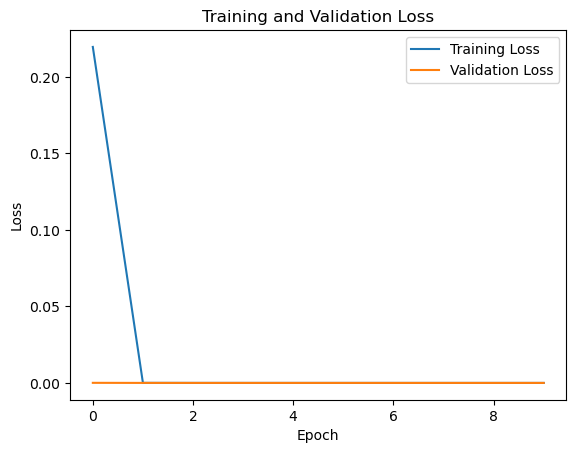

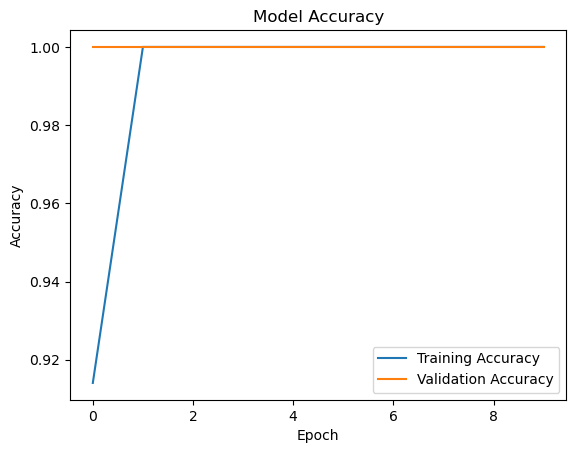

In [31]:
# Train the model and record training history
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [34]:
patch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/patches"
scratch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/scratches"

In [35]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Scratch', 'Patch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class



In [36]:
def evaluate_model(model, val_scratch_dir, val_patch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Scratch" else 1)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Scratch" else 1)

   
    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat



In [38]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, scratch_val_dir, patch_val_dir)
print("Accuracy by training 240 images for Binary Classification:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Accuracy by training 240 images for Binary Classification:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[60  0]
 [ 0 60]]


### With model trained on 8 images per defect

In [39]:
scratch_data, scratch_labels = load_eight_dataset(scratch_dir)
patch_data, patch_labels = load_eight_dataset(patch_dir)

In [40]:
data = np.concatenate((scratch_data, patch_data), axis=0)
labels = np.concatenate((scratch_labels, patch_labels), axis=0)

In [41]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [46]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)


# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.6667 - loss: 1.4874 - val_accuracy: 0.5000 - val_loss: 0.5103
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - accuracy: 1.0000 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - accuracy: 1.0000 - loss: 7.3989e-04 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 1.0000 - loss: 2.3613e-04 - val_accuracy: 1.0000 - val_loss: 2.9160e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 1.0000 - loss: 2.4644e-04 - val_accuracy: 1.0000 - val_loss: 5.6800e-05
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 1.0000 - loss: 2.7411e-04 - val_accuracy: 1.0000 - val_loss: 1.4692e-05
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 1.0000 - loss: 2.8726e-04 - val_accuracy: 1.0000 - val_loss: 4.7385e-06
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 1.0000 - loss: 2.7978

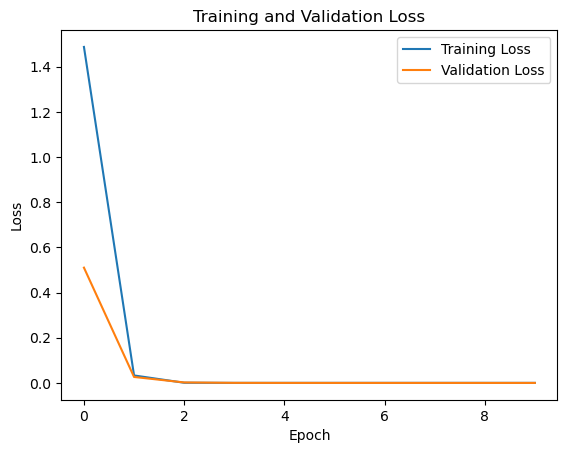

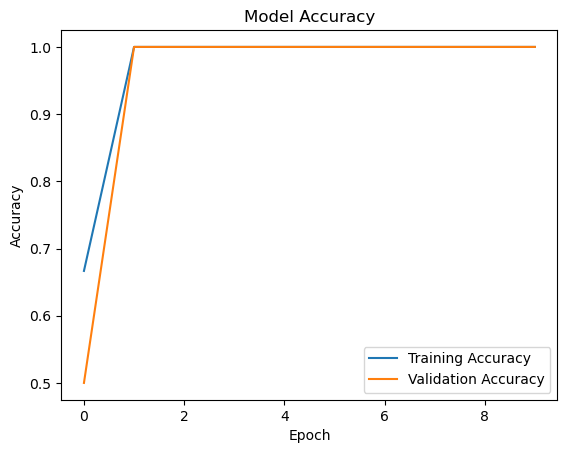

In [47]:
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [43]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Scratch', 'Patch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

In [44]:
def evaluate_model(model, val_scratch_dir, val_patch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Scratch" else 1)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Scratch" else 1)

   
    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat


In [45]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, scratch_val_dir, patch_val_dir)
print("Accuracy by training 8 images for Binary Classification:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Accuracy for training 8 images:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[60  0]
 [ 0 60]]


# Calculating evaluation metrics with Augmented Data

## Horizontal Flipping

In [49]:
crazing_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/crazing"
inclusion_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/inclusion"
patch_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/patches"
pitted_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/pitted_surface"
rolled_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/rolled-in_scale"
scratch_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/images_augmented/scratches"

### Training all 240 images per defect

In [50]:
def load_dataset(directory):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        if 'flippedHorz' in img_name:
            img_path = os.path.join(directory, img_name)
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0  
            data.append(img_array)
            labels.append(0 if directory.endswith('crazing') else
                          1 if directory.endswith('inclusion') else
                          2 if directory.endswith('patches') else
                          3 if directory.endswith('pitted_surface') else
                          4 if directory.endswith('rolled-in_scale') else
                          5) 
    return np.array(data), np.array(labels)

In [51]:
crazing_data, crazing_labels = load_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_dataset(inclusion_dir)
patch_data, patch_labels = load_dataset(patch_dir)
pitted_data, pitted_labels = load_dataset(pitted_dir)
rolled_data, rolled_labels = load_dataset(rolled_dir)
scratch_data, scratch_labels = load_dataset(scratch_dir)

In [52]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

In [53]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [54]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)

# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 992ms/step - accuracy: 0.7883 - loss: 0.5719 - val_accuracy: 0.9306 - val_loss: 0.2111
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 44s 967ms/step - accuracy: 0.9942 - loss: 0.0366 - val_accuracy: 0.9861 - val_loss: 0.0272
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 929ms/step - accuracy: 0.9998 - loss: 0.0044 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 905ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9917 - val_loss: 0.0279
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 895ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 889ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9972 - val_loss: 0.0180
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 909ms/step - accuracy: 1.0000 - loss: 7.9713e-04 - val_accuracy: 0.9944 - val_loss: 0.0176
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 904ms/step - accuracy: 1.0000 - loss: 7.4261e-04 - 

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 907ms/step - accuracy: 1.0000 - loss: 4.5999e-04 - val_accuracy: 0.9944 - val_loss: 0.0157
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 885ms/step - accuracy: 1.0000 - loss: 3.9902e-04 - val_accuracy: 0.9944 - val_loss: 0.0161
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 904ms/step - accuracy: 1.0000 - loss: 3.1378e-04 - val_accuracy: 0.9944 - val_loss: 0.0152
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 892ms/step - accuracy: 1.0000 - loss: 2.9321e-04 - val_accuracy: 0.9944 - val_loss: 0.0153
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 888ms/step - accuracy: 1.0000 - loss: 2.4422e-04 - val_accuracy: 0.9944 - val_loss: 0.0152
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 895ms/step - accuracy: 1.0000 - loss: 2.0245e-04 - val_accuracy: 0.9944 - val_loss: 0.0157
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 44s 971ms/step - accuracy: 1.0000 - loss: 1.8272e-04 - val_accuracy: 0.9944 - val_loss: 0.0154
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 1.0000 

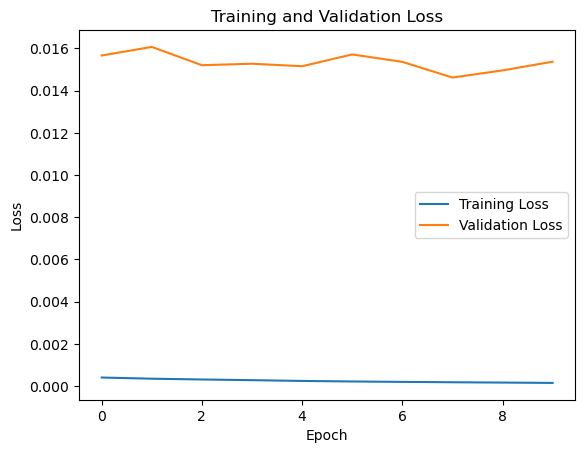

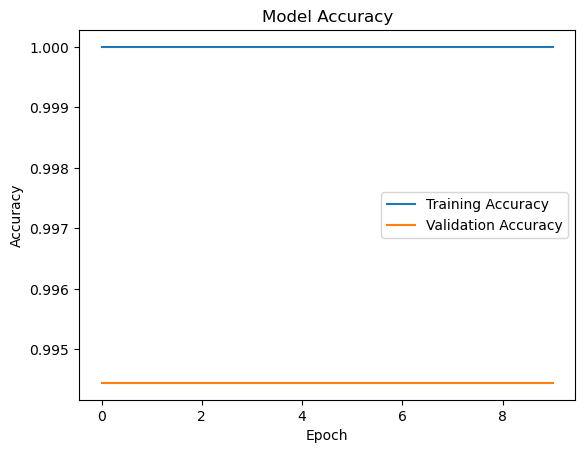

In [55]:
# Train the model and record training history
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

crazing_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/crazing"
inclusion_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/inclusion"
patch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/patches"
pitted_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/pitted_surface"
rolled_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/rolled-in_scale"
scratch_val_dir = "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/validation/images/scratches"

In [57]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class


In [58]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat


In [59]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training of model on 240 horizontally flipped images per defect:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Accuracy for training of model on 240 horizontally flipped images per defect:
Accuracy: 0.8361111111111111
Precision: 0.9173669467787116
Recall: 0.8361111111111111
Confusion Matrix:
[[ 7  0  0  0 53  0]

### Training all 8 images per defect

In [60]:
def load_eight_dataset(directory, num_samples=8):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        if 'flippedHorz' in img_name:
            img_path = os.path.join(directory, img_name)
            if os.path.isfile(img_path):  # Check if it's a file
                img = load_img(img_path, target_size=(150, 150))
                img_array = img_to_array(img) / 255.0
                data.append(img_array)
                labels.append(0 if directory.endswith('crazing') else
                          1 if directory.endswith('inclusion') else
                          2 if directory.endswith('patches') else
                          3 if directory.endswith('pitted_surface') else
                          4 if directory.endswith('rolled-in_scale') else
                          5)
    
    
    
    # Randomly select num_samples images from the data
    if len(data) > num_samples:
        selected_indices = random.sample(range(len(data)), num_samples)
        data = [data[i] for i in selected_indices]
        labels = [labels[i] for i in selected_indices]
    
    return np.array(data), np.array(labels)


In [61]:
crazing_data, crazing_labels = load_eight_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_eight_dataset(inclusion_dir)
patch_data, patch_labels = load_eight_dataset(patch_dir)
pitted_data, pitted_labels = load_eight_dataset(pitted_dir)
rolled_data, rolled_labels = load_eight_dataset(rolled_dir)
scratch_data, scratch_labels = load_eight_dataset(scratch_dir)

In [62]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

In [63]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [64]:
data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)


# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2100 - loss: 2.0991 - val_accuracy: 0.3000 - val_loss: 2.0079
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.6365 - loss: 0.7753 - val_accuracy: 0.9000 - val_loss: 0.4598
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 0.9720 - loss: 0.1130 - val_accuracy: 1.0000 - val_loss: 0.1464
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 1.0000 - loss: 0.0700 - val_accuracy: 0.9000 - val_loss: 0.2472
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 1.0000 - loss: 0.0755 - val_accuracy: 0.9000 - val_loss: 0.2282
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 1.0000 - loss: 0.0351 - val_accuracy: 1.0000 - val_loss: 0.0907
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0623
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.

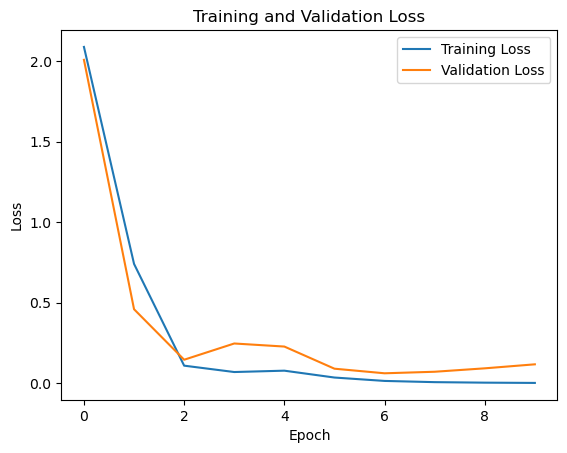

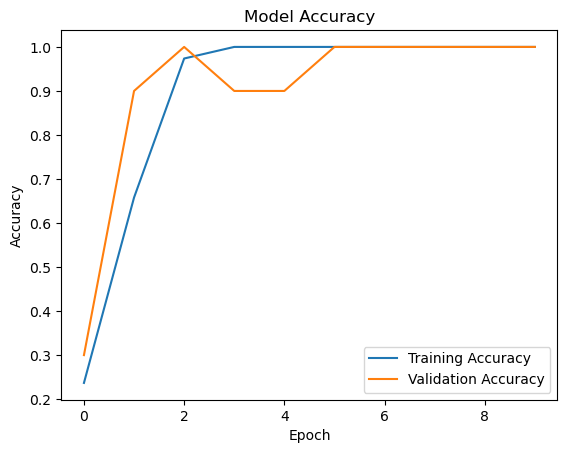

In [65]:
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [70]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

In [71]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat


In [72]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training of model on 8 horizontally flipped images per defect:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy for training of model on 8 horizontally flipped images per defect:
Accuracy: 0.6972222222222222
Precision: 0.6787842810080006
Recall: 0.6972222222222222
Confusion Matrix:
[[ 0  0  0  0 60  0]
 

## Vertical Flipping

### Training all 240 images per defect

In [73]:
def load_dataset(directory):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        if 'flippedVert' in img_name:
            img_path = os.path.join(directory, img_name)
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0  
            data.append(img_array)
            labels.append(0 if directory.endswith('crazing') else
                          1 if directory.endswith('inclusion') else
                          2 if directory.endswith('patches') else
                          3 if directory.endswith('pitted_surface') else
                          4 if directory.endswith('rolled-in_scale') else
                          5) 
    return np.array(data), np.array(labels)

In [74]:
crazing_data, crazing_labels = load_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_dataset(inclusion_dir)
patch_data, patch_labels = load_dataset(patch_dir)
pitted_data, pitted_labels = load_dataset(pitted_dir)
rolled_data, rolled_labels = load_dataset(rolled_dir)
scratch_data, scratch_labels = load_dataset(scratch_dir)

In [75]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

In [76]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)

# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 50s 902ms/step - accuracy: 0.8380 - loss: 0.4435 - val_accuracy: 0.9944 - val_loss: 0.0131
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 846ms/step - accuracy: 0.9896 - loss: 0.0300 - val_accuracy: 0.9944 - val_loss: 0.0248
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 843ms/step - accuracy: 0.9940 - loss: 0.0163 - val_accuracy: 0.9972 - val_loss: 0.0097
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 852ms/step - accuracy: 0.9999 - loss: 0.0045 - val_accuracy: 0.9972 - val_loss: 0.0076
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 925ms/step - accuracy: 0.9967 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 853ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9972 - val_loss: 0.0035
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 863ms/step - accuracy: 1.0000 - loss: 5.2703e-04 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 841ms/step - accuracy: 1.0000 - loss: 3.4744e-04 - 

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 863ms/step - accuracy: 1.0000 - loss: 2.5211e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 855ms/step - accuracy: 1.0000 - loss: 2.2085e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 927ms/step - accuracy: 1.0000 - loss: 1.9591e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 839ms/step - accuracy: 1.0000 - loss: 1.6842e-04 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 1.0000 - loss: 1.8246e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 840ms/step - accuracy: 1.0000 - loss: 2.0376e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 882ms/step - accuracy: 1.0000 - loss: 1.6439e-04 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 915ms/step - accuracy: 1.00

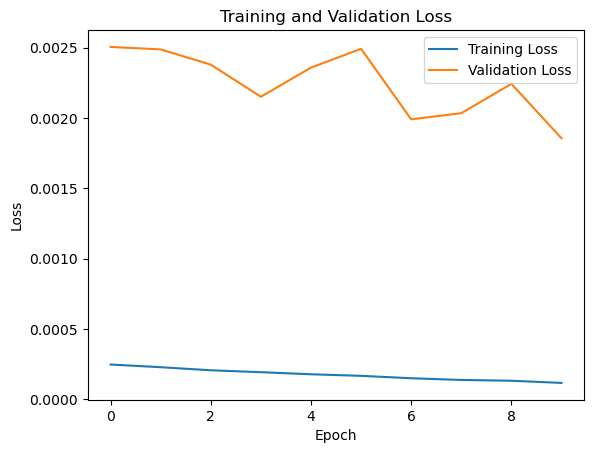

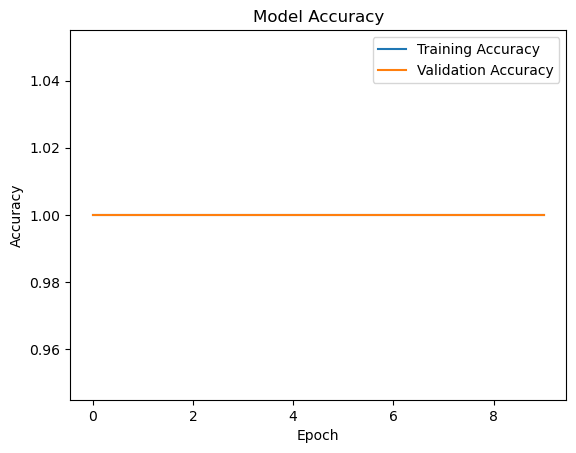

In [77]:
# Train the model and record training history
history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [78]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

In [79]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat


In [80]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training of model on 8 horizontally flipped images per defect:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Accuracy for training of model on 8 horizontally flipped images per defect:
Accuracy: 0.8444444444444444
Precision: 0.9195402298850575
Recall: 0.8444444444444444
Confusion Matrix:
[[10  0  0  0 50  0]
 

### Training all 8 images per defect

In [81]:
def load_eight_dataset(directory, num_samples=8):
    data = []
    labels = []
    for img_name in os.listdir(directory):
        if 'flippedVert' in img_name:
            img_path = os.path.join(directory, img_name)
            if os.path.isfile(img_path):  # Check if it's a file
                img = load_img(img_path, target_size=(150, 150))
                img_array = img_to_array(img) / 255.0
                data.append(img_array)
                labels.append(0 if directory.endswith('crazing') else
                          1 if directory.endswith('inclusion') else
                          2 if directory.endswith('patches') else
                          3 if directory.endswith('pitted_surface') else
                          4 if directory.endswith('rolled-in_scale') else
                          5)
    
    
    
    # Randomly select num_samples images from the data
    if len(data) > num_samples:
        selected_indices = random.sample(range(len(data)), num_samples)
        data = [data[i] for i in selected_indices]
        labels = [labels[i] for i in selected_indices]
    
    return np.array(data), np.array(labels)


In [82]:
crazing_data, crazing_labels = load_eight_dataset(crazing_dir)
inclusion_data, inclusion_labels = load_eight_dataset(inclusion_dir)
patch_data, patch_labels = load_eight_dataset(patch_dir)
pitted_data, pitted_labels = load_eight_dataset(pitted_dir)
rolled_data, rolled_labels = load_eight_dataset(rolled_dir)
scratch_data, scratch_labels = load_eight_dataset(scratch_dir)

In [83]:
data = np.concatenate((crazing_data, inclusion_data, patch_data, pitted_data, rolled_data, scratch_data), axis=0)
labels = np.concatenate((crazing_labels, inclusion_labels, patch_labels, pitted_labels, rolled_labels, scratch_labels), axis=0)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.0280 - loss: 2.3076 - val_accuracy: 0.7000 - val_loss: 1.4712
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - accuracy: 0.6086 - loss: 1.0550 - val_accuracy: 0.8000 - val_loss: 0.5527
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - accuracy: 0.7763 - loss: 0.6201 - val_accuracy: 0.9000 - val_loss: 0.1809
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 1.0000 - loss: 0.1277 - val_accuracy: 0.9000 - val_loss: 0.2200
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.9720 - loss: 0.0814 - val_accuracy: 0.9000 - val_loss: 0.2791
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.9649 - loss: 0.1290 - val_accuracy: 0.8000 - val_loss: 0.3542
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.9720 - loss: 0.0569 - val_accuracy: 0.7000 - val_loss: 0.6901
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.7000 - val_loss: 0.

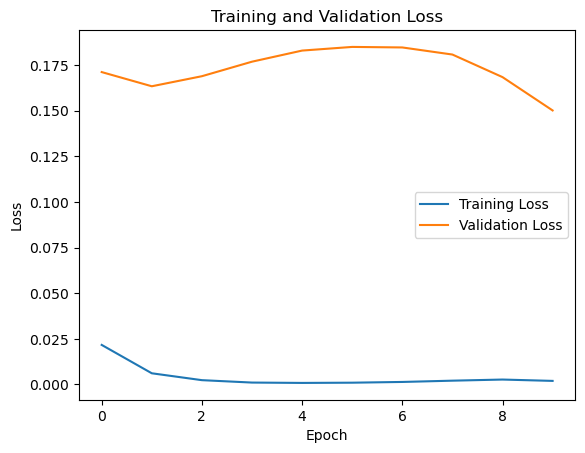

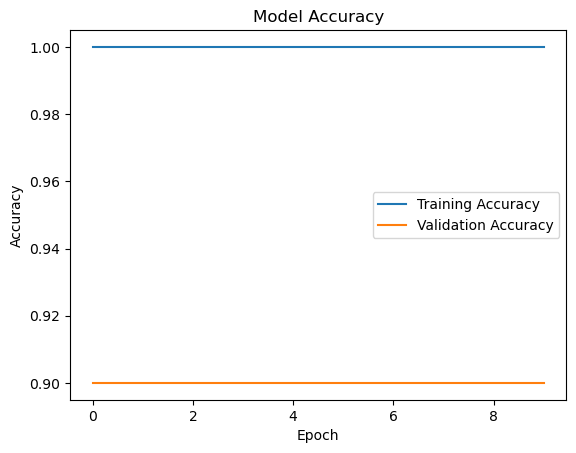

In [84]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

data_resized = []
for img in data:
    img_resized = tf.image.resize(img, (224, 224))
    data_resized.append(img_resized)

# Convert the resized images to a numpy array
data_resized = np.array(data_resized)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

history = model.fit(data_resized, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [85]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
   
    class_labels = ['Crazing', 'Inclusion', 'Patch', 'Pitted', 'Rolled_In', 'Scratch']
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

In [86]:
def evaluate_model(model, val_crazing_dir, val_inclusion_dir, val_patch_dir, val_pitted_dir, val_rolled_dir, val_scratch_dir):
    true_labels = []
    predicted_labels = []

    # Evaluate on crazing images
    for img_name in os.listdir(val_crazing_dir):
        img_path = os.path.join(val_crazing_dir, img_name)
        true_labels.append(0)  # True label for crazing
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Evaluate on inclusion images
    for img_name in os.listdir(val_inclusion_dir):
        img_path = os.path.join(val_inclusion_dir, img_name)
        true_labels.append(1)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    for img_name in os.listdir(val_patch_dir):
        img_path = os.path.join(val_patch_dir, img_name)
        true_labels.append(2)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_pitted_dir):
        img_path = os.path.join(val_pitted_dir, img_name)
        true_labels.append(3)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_rolled_dir):
        img_path = os.path.join(val_rolled_dir, img_name)
        true_labels.append(4)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)
        
    for img_name in os.listdir(val_scratch_dir):
        img_path = os.path.join(val_scratch_dir, img_name)
        true_labels.append(5)  # True label for inclusion
        prediction = predict_image(img_path)
        predicted_labels.append(0 if prediction == "Crazing" else 1 if prediction == "Inclusion" else 2 if prediction == "Patch" else 3 if prediction == "Pitted" else 4 if prediction == "Rolled_In" else 5)

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, confusion_mat

In [87]:
accuracy, precision, recall, confusion_mat = evaluate_model(model, crazing_val_dir, inclusion_val_dir, patch_val_dir, pitted_val_dir, rolled_val_dir, scratch_val_dir)

print("Accuracy for training of model on 8 horizontally flipped images per defect:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Accuracy for training of model on 8 horizontally flipped images per defect:
Accuracy: 0.8
Precision: 0.8656453023488255
Recall: 0.8
Confusion Matrix:
[[34  0  0  0 26  0]
 [ 0 60  0  0  0  0]
 [ 0  0 42

# Statistics

In [88]:
import os
import cv2
import numpy as np

In [89]:
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

In [90]:
def calculate_gray_level_stats(folder_path):
    gray_levels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        gray_levels.extend(img.flatten())
    min_gray_level = np.min(gray_levels)
    max_gray_level = np.max(gray_levels)
    median_gray_level = np.median(gray_levels)
    return min_gray_level, max_gray_level, median_gray_level

In [91]:
for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    print(f"Folder: {folder_name}")
    print(f"Minimum Gray Level: {min_level}")
    print(f"Maximum Gray Level: {max_level}")
    print(f"Median Gray Level: {median_level}")
    print()

Folder: crazing
Minimum Gray Level: 0
Maximum Gray Level: 255
Median Gray Level: 138.0

Folder: inclusion
Minimum Gray Level: 35
Maximum Gray Level: 255
Median Gray Level: 98.0

Folder: patch
Minimum Gray Level: 0
Maximum Gray Level: 255
Median Gray Level: 129.0

Folder: pitted_surface
Minimum Gray Level: 16
Maximum Gray Level: 255
Median Gray Level: 188.0

Folder: rolled-in_scale
Minimum Gray Level: 9
Maximum Gray Level: 255
Median Gray Level: 127.0

Folder: scratches
Minimum Gray Level: 17
Maximum Gray Level: 255
Median Gray Level: 93.0



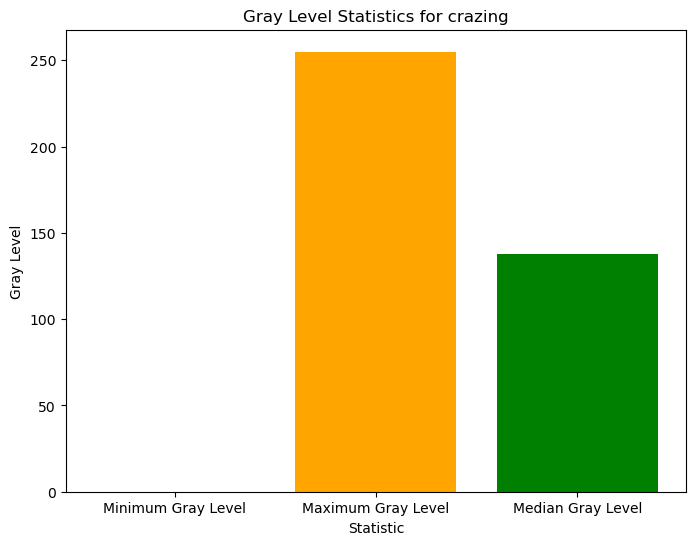

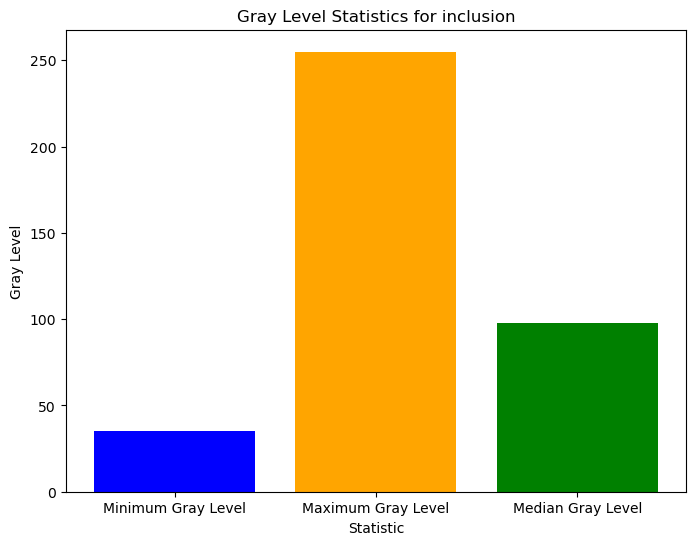

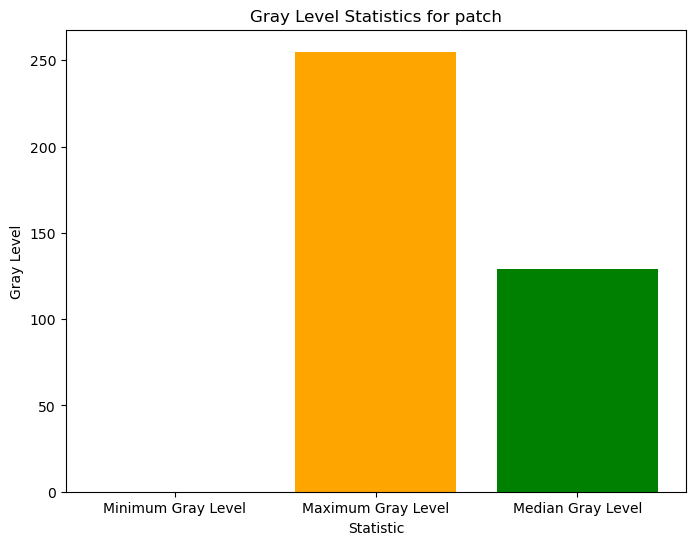

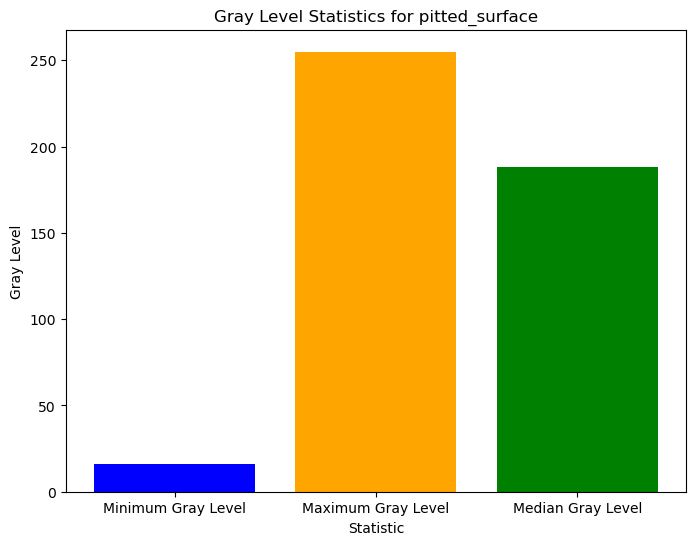

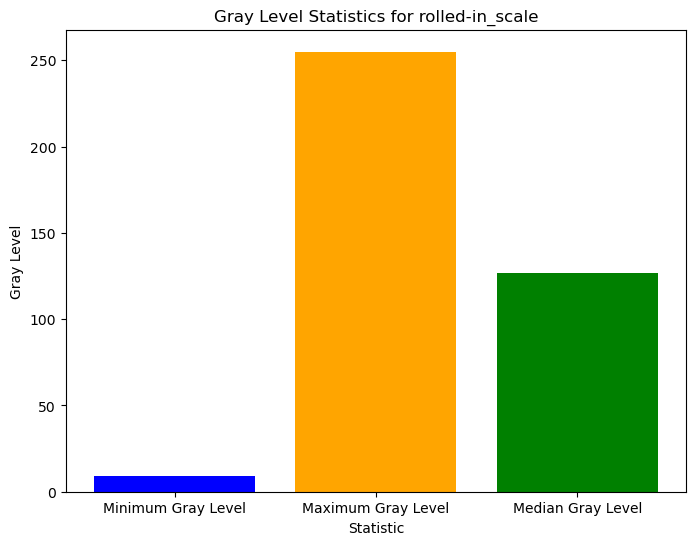

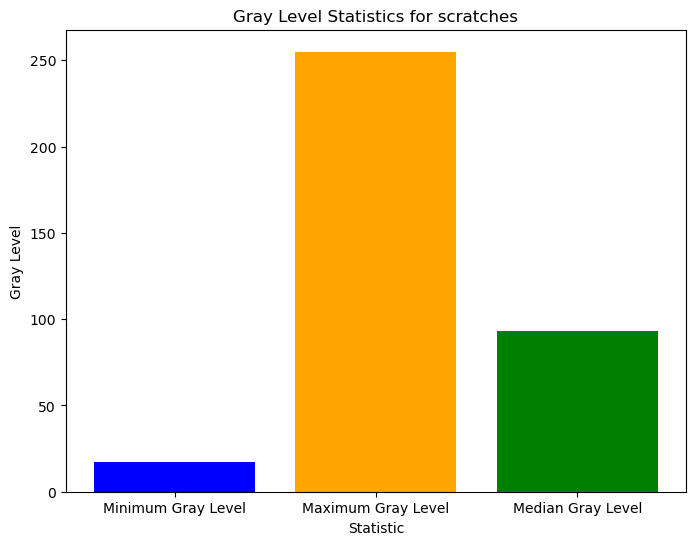

In [92]:
import matplotlib.pyplot as plt

for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    
    # Plot bar chart
    labels = ['Minimum Gray Level', 'Maximum Gray Level', 'Median Gray Level']
    values = [min_level, max_level, median_level]
    
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'orange', 'green'])
    plt.title(f"Gray Level Statistics for {folder_name}")
    plt.xlabel('Statistic')
    plt.ylabel('Gray Level')
    plt.show()

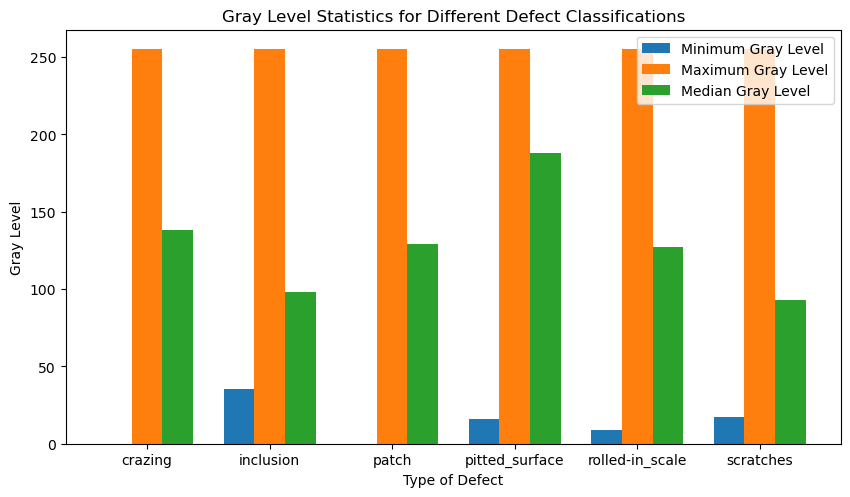

In [93]:

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Initialize lists to store statistics
min_levels = []
max_levels = []
median_levels = []

# Function to calculate min, max, median of gray levels of images in a folder
def calculate_gray_level_stats(folder_path):
    gray_levels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        gray_levels.extend(img.flatten())
    min_gray_level = np.min(gray_levels)
    max_gray_level = np.max(gray_levels)
    median_gray_level = np.median(gray_levels)
    return min_gray_level, max_gray_level, median_gray_level

# Calculate gray level stats for each folder
for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    min_levels.append(min_level)
    max_levels.append(max_level)
    median_levels.append(median_level)

# Plot all statistics in one bar chart
labels = list(folders.keys())
x = np.arange(len(labels))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, min_levels, width=bar_width, label='Minimum Gray Level')
plt.bar(x, max_levels, width=bar_width, label='Maximum Gray Level')
plt.bar(x + bar_width, median_levels, width=bar_width, label='Median Gray Level')

plt.xlabel('Type of Defect')
plt.ylabel('Gray Level')
plt.title('Gray Level Statistics for Different Defect Classifications')
plt.xticks(x, labels)
plt.legend(loc='upper right')

# Adjust subplot parameters to add extra space at the top
plt.subplots_adjust(top=0.8)

plt.show()


C:\Users\Checkout\anaconda3\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


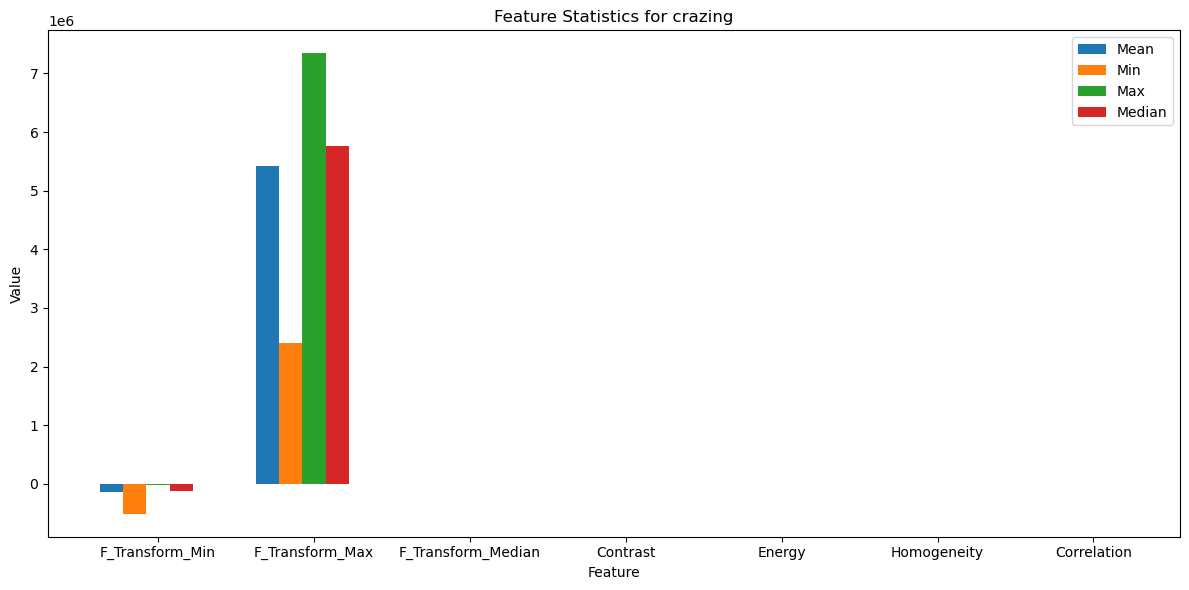

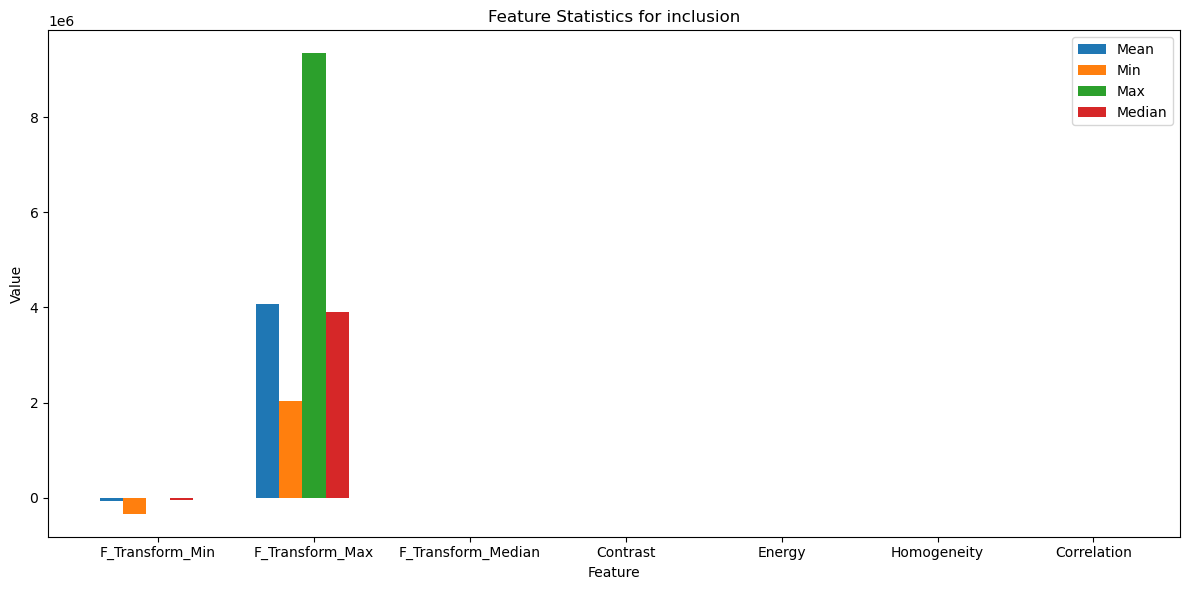

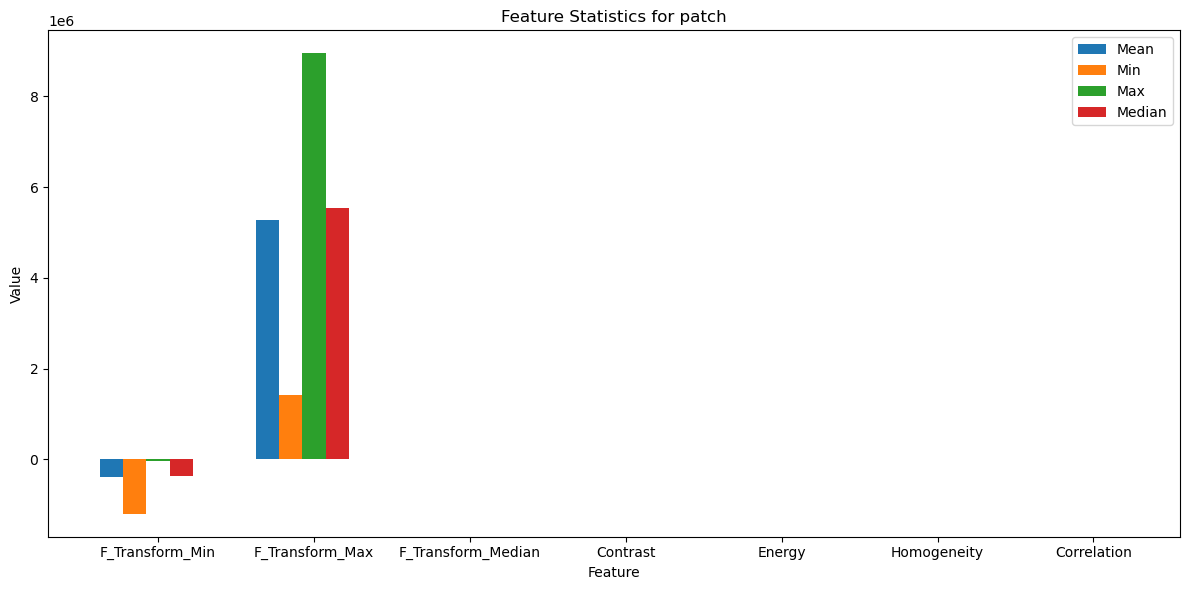

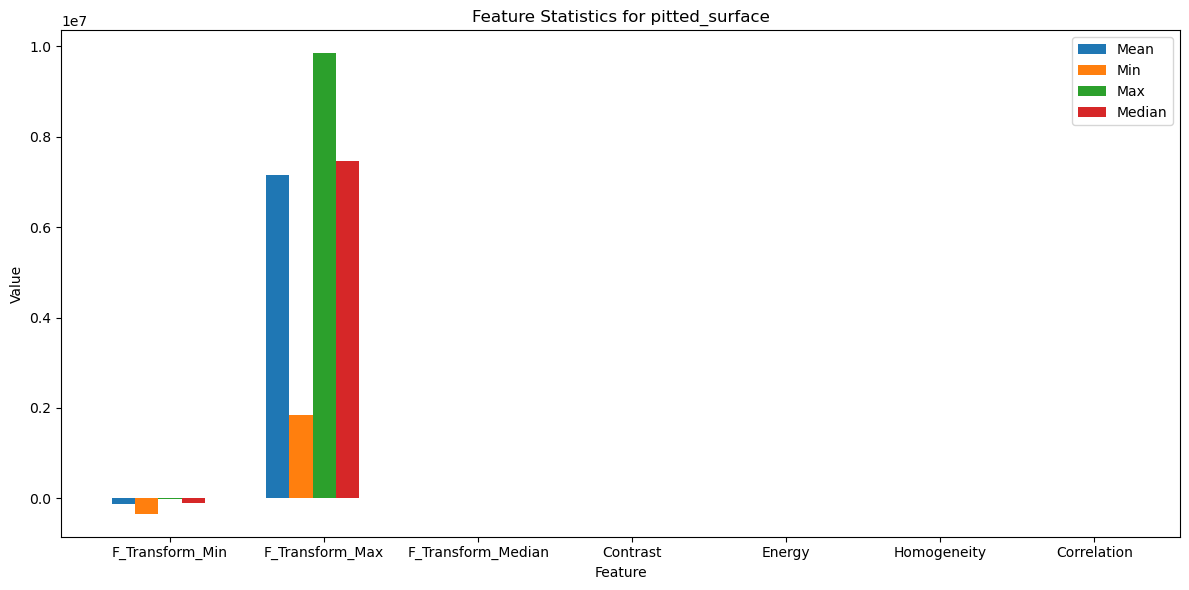

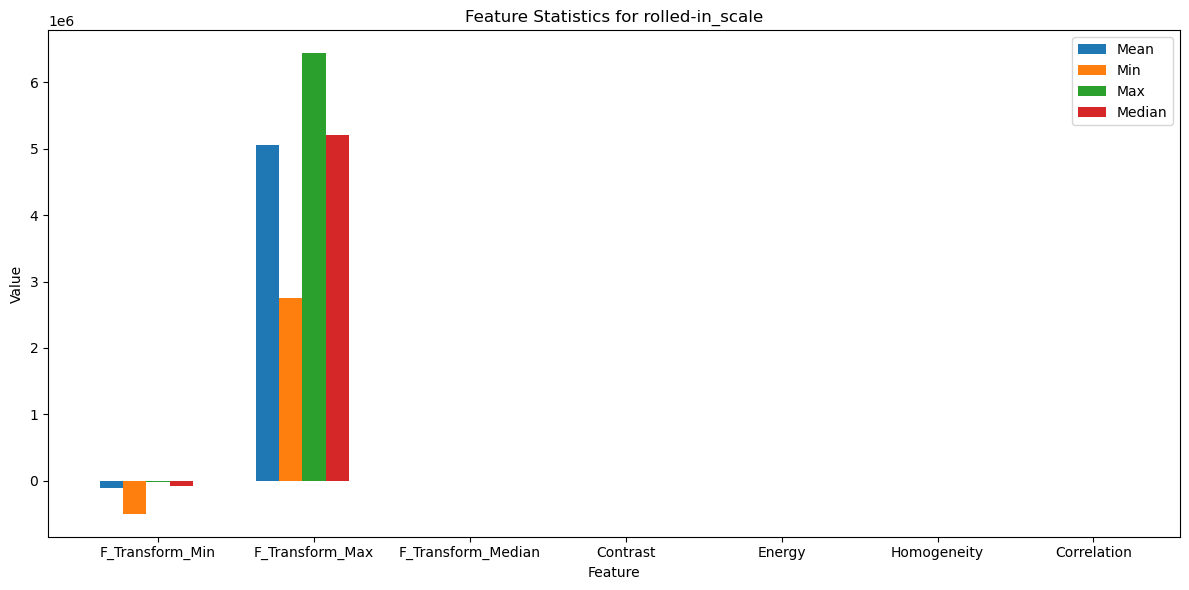

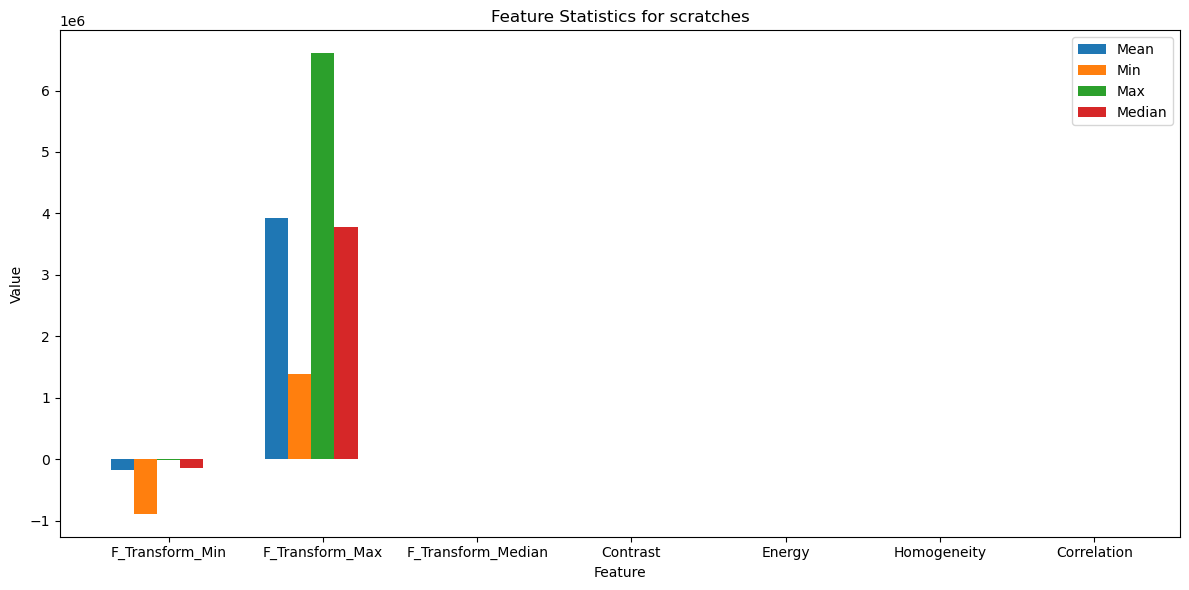

In [95]:
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2, fftshift

def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Function to compute Haralick Texture Features
def compute_haralick_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').ravel()[0]
    energy = graycoprops(glcm, 'energy').ravel()[0]
    homogeneity = graycoprops(glcm, 'homogeneity').ravel()[0]
    correlation = graycoprops(glcm, 'correlation').ravel()[0]
    return contrast, energy, homogeneity, correlation

# Initialize lists to store feature values for each folder
folder_features = {folder_name: {'f_transform_min': [], 'f_transform_max': [], 'f_transform_median': [],
                                 'contrast': [], 'energy': [], 'homogeneity': [], 'correlation': []}
                   for folder_name in folders}

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Compute Haralick Texture Features
        contrast, energy, homogeneity, correlation = compute_haralick_features(img)
        
        # Store feature values for the current image
        folder_features[folder_name]['f_transform_min'].append(np.min(f_transform))
        folder_features[folder_name]['f_transform_max'].append(np.max(f_transform))
        folder_features[folder_name]['f_transform_median'].append(np.median(f_transform))
        folder_features[folder_name]['contrast'].append(contrast)
        folder_features[folder_name]['energy'].append(energy)
        folder_features[folder_name]['homogeneity'].append(homogeneity)
        folder_features[folder_name]['correlation'].append(correlation)

# Plot bar charts for each folder
for folder_name, features in folder_features.items():
    plt.figure(figsize=(12, 6))
    bar_width = 0.15
    x = np.arange(len(features))
    
    plt.bar(x - 2*bar_width, [np.mean(features['f_transform_min']), np.mean(features['f_transform_max']),
                               np.mean(features['f_transform_median']), np.mean(features['contrast']),
                               np.mean(features['energy']), np.mean(features['homogeneity']),
                               np.mean(features['correlation'])],
            width=bar_width, label='Mean')
    
    plt.bar(x - bar_width, [np.min(features['f_transform_min']), np.min(features['f_transform_max']),
                             np.min(features['f_transform_median']), np.min(features['contrast']),
                             np.min(features['energy']), np.min(features['homogeneity']),
                             np.min(features['correlation'])],
            width=bar_width, label='Min')
    
    plt.bar(x, [np.max(features['f_transform_min']), np.max(features['f_transform_max']),
                np.max(features['f_transform_median']), np.max(features['contrast']),
                np.max(features['energy']), np.max(features['homogeneity']),
                np.max(features['correlation'])],
            width=bar_width, label='Max')
    
    plt.bar(x + bar_width, [np.median(features['f_transform_min']), np.median(features['f_transform_max']),
                             np.median(features['f_transform_median']), np.median(features['contrast']),
                             np.median(features['energy']), np.median(features['homogeneity']),
                             np.median(features['correlation'])],
            width=bar_width, label='Median')
    
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Feature Statistics for {folder_name}')
    plt.xticks(x, ['F_Transform_Min', 'F_Transform_Max', 'F_Transform_Median', 
                   'Contrast', 'Energy', 'Homogeneity', 'Correlation'])
    plt.legend()
    plt.tight_layout()
    plt.show()


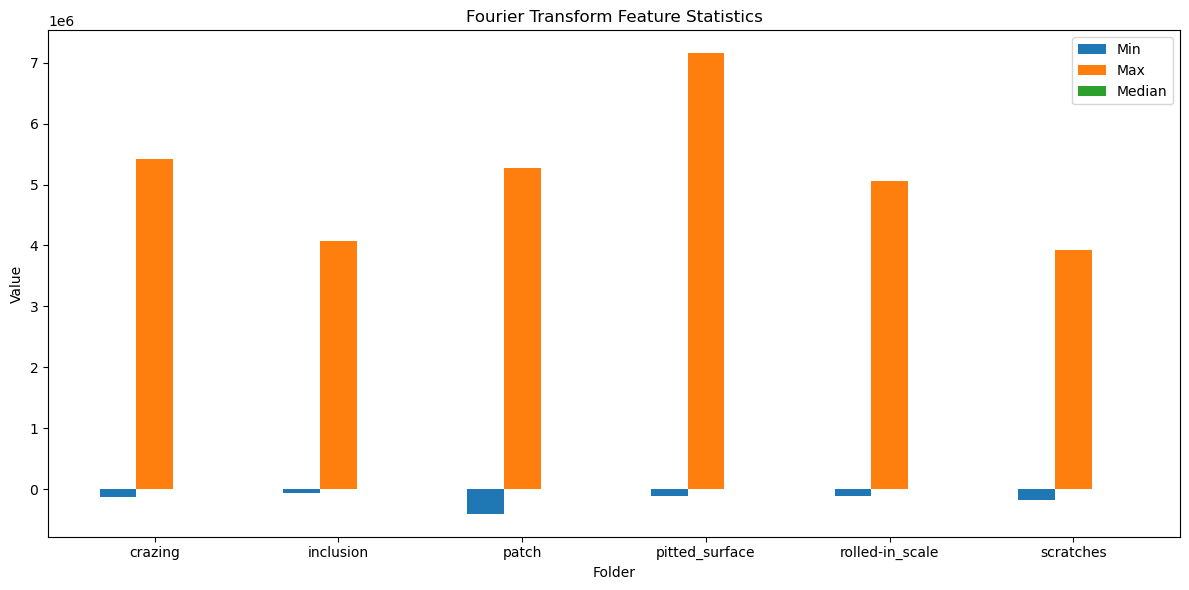

In [96]:
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
f_transform_min_vals = []
f_transform_max_vals = []
f_transform_median_vals = []
folder_names = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    folder_names.append(folder_name)
    f_transform_min = []
    f_transform_max = []
    f_transform_median = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        f_transform_min.append(np.min(f_transform))
        f_transform_max.append(np.max(f_transform))
        f_transform_median.append(np.median(f_transform))
    
    # Store the mean values for each feature
    f_transform_min_vals.append(np.mean(f_transform_min))
    f_transform_max_vals.append(np.mean(f_transform_max))
    f_transform_median_vals.append(np.mean(f_transform_median))

# Plot bar chart for Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(folder_names))

plt.bar(x - bar_width, f_transform_min_vals, width=bar_width, label='Min')
plt.bar(x, f_transform_max_vals, width=bar_width, label='Max')
plt.bar(x + bar_width, f_transform_median_vals, width=bar_width, label='Median')

plt.xlabel('Folder')
plt.ylabel('Value')
plt.title('Fourier Transform Feature Statistics')
plt.xticks(x, folder_names)
plt.legend()
plt.tight_layout()
plt.show()


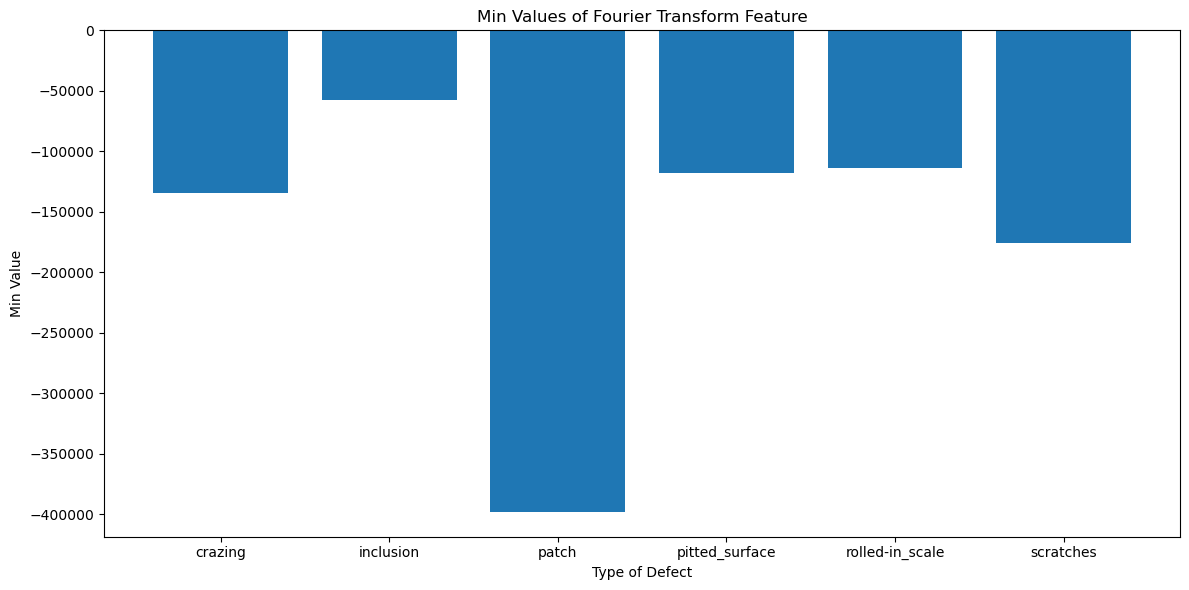

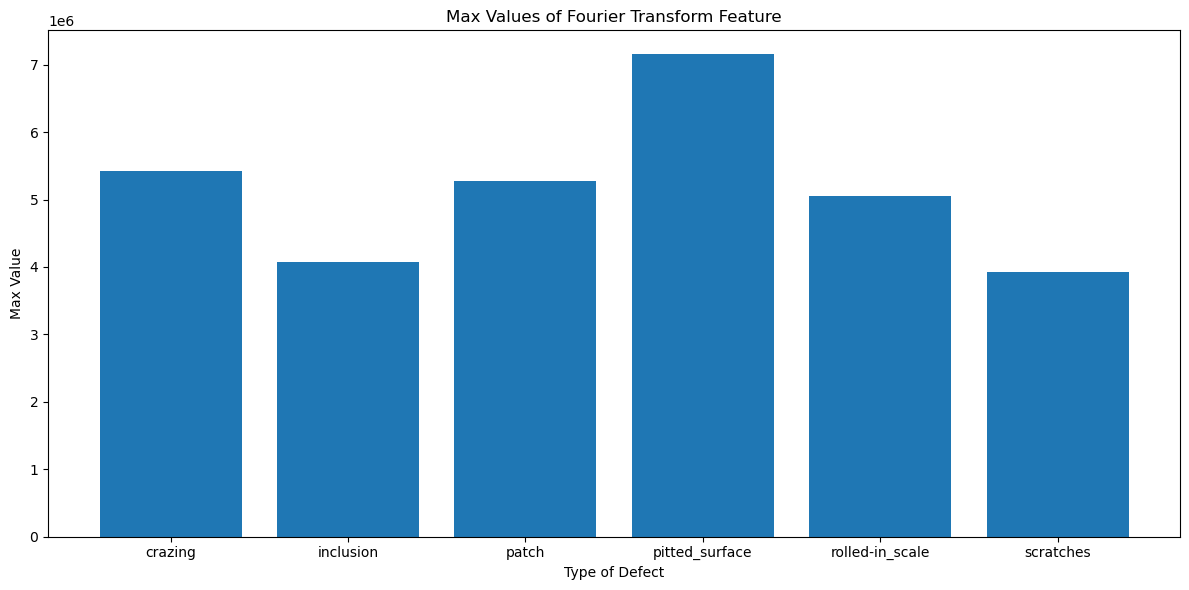

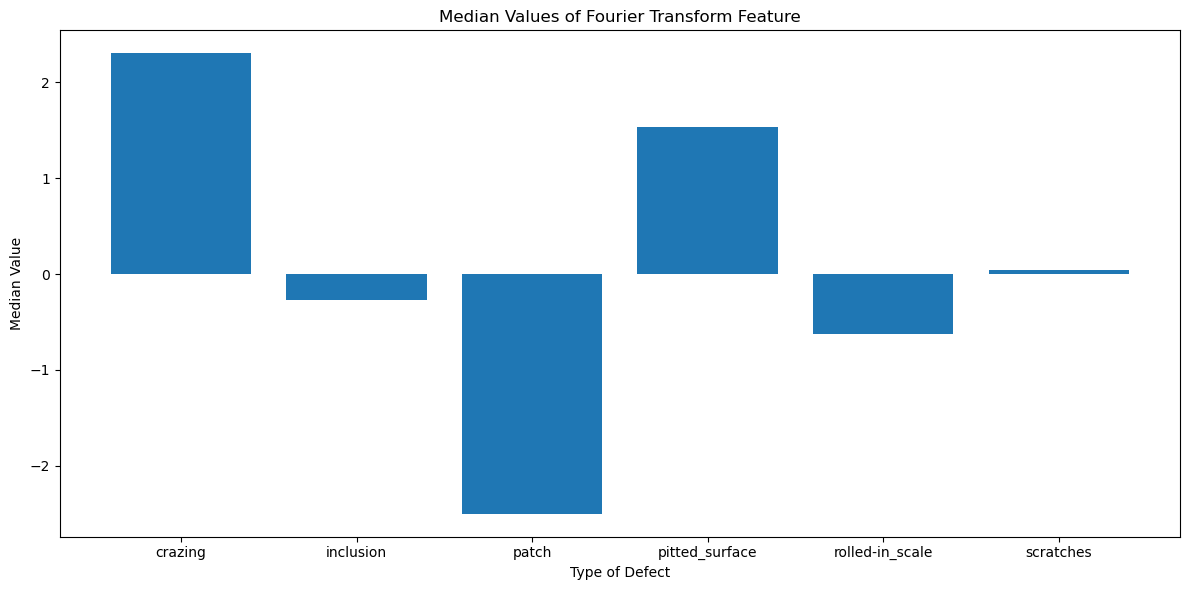

In [97]:
import os
import cv2
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
f_transform_min_vals = []
f_transform_max_vals = []
f_transform_median_vals = []
folder_names = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    folder_names.append(folder_name)
    f_transform_min = []
    f_transform_max = []
    f_transform_median = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        f_transform_min.append(np.min(f_transform))
        f_transform_max.append(np.max(f_transform))
        f_transform_median.append(np.median(f_transform))
    
    # Store the mean values for each feature
    f_transform_min_vals.append(np.mean(f_transform_min))
    f_transform_max_vals.append(np.mean(f_transform_max))
    f_transform_median_vals.append(np.mean(f_transform_median))

# Plot bar chart for Min values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
x = np.arange(len(folder_names))
plt.bar(x, f_transform_min_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Min Value')
plt.title('Min Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()

# Plot bar chart for Max values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
plt.bar(x, f_transform_max_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Max Value')
plt.title('Max Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()

# Plot bar chart for Median values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
plt.bar(x, f_transform_median_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Median Value')
plt.title('Median Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()

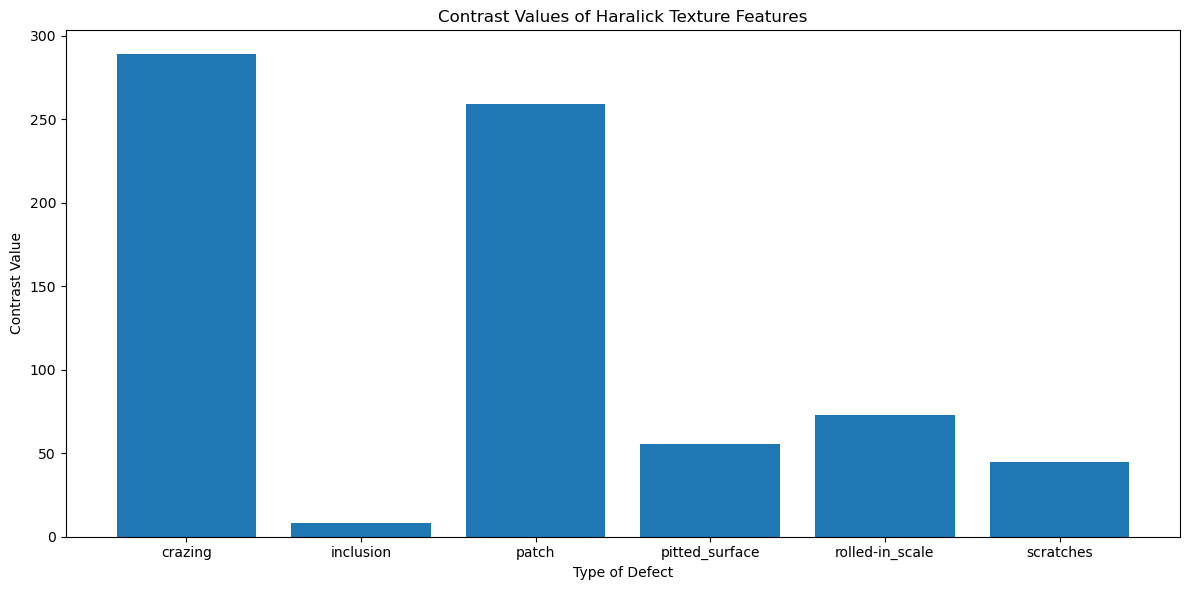

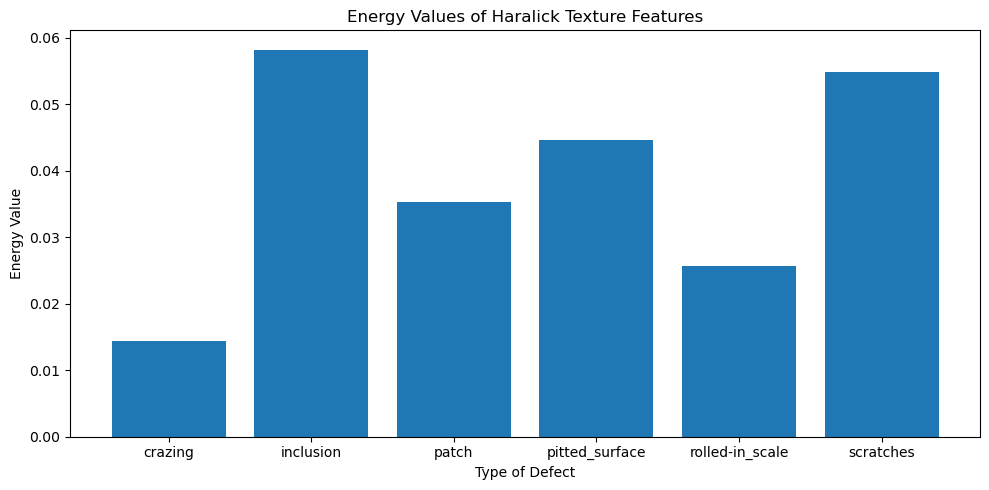

In [98]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Haralick Texture Features of images
def compute_haralick_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').ravel()[0]
    energy = graycoprops(glcm, 'energy').ravel()[0]
    homogeneity = graycoprops(glcm, 'homogeneity').ravel()[0]
    correlation = graycoprops(glcm, 'correlation').ravel()[0]
    return contrast, energy, homogeneity, correlation

# Initialize lists to store Haralick Texture Feature values for each folder
haralick_contrast_vals = []
haralick_energy_vals = []
haralick_homogeneity_vals = []
haralick_correlation_vals = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    contrast_vals = []
    energy_vals = []
    homogeneity_vals = []
    correlation_vals = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Haralick Texture Features
        contrast, energy, homogeneity, correlation = compute_haralick_features(img)
        
        # Store Haralick Texture Feature values for the current image
        contrast_vals.append(contrast)
        energy_vals.append(energy)
        homogeneity_vals.append(homogeneity)
        correlation_vals.append(correlation)
    
    # Store the mean values for each feature
    haralick_contrast_vals.append(np.mean(contrast_vals))
    haralick_energy_vals.append(np.mean(energy_vals))
    haralick_homogeneity_vals.append(np.mean(homogeneity_vals))
    haralick_correlation_vals.append(np.mean(correlation_vals))

# Plot bar chart for Contrast values of Haralick Texture Features for each folder
plt.figure(figsize=(12, 6))
x = np.arange(len(folders))
plt.bar(x, haralick_contrast_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Contrast Value')
plt.title('Contrast Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()

# Plot bar chart for Energy values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_energy_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Energy Value')
plt.title('Energy Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()


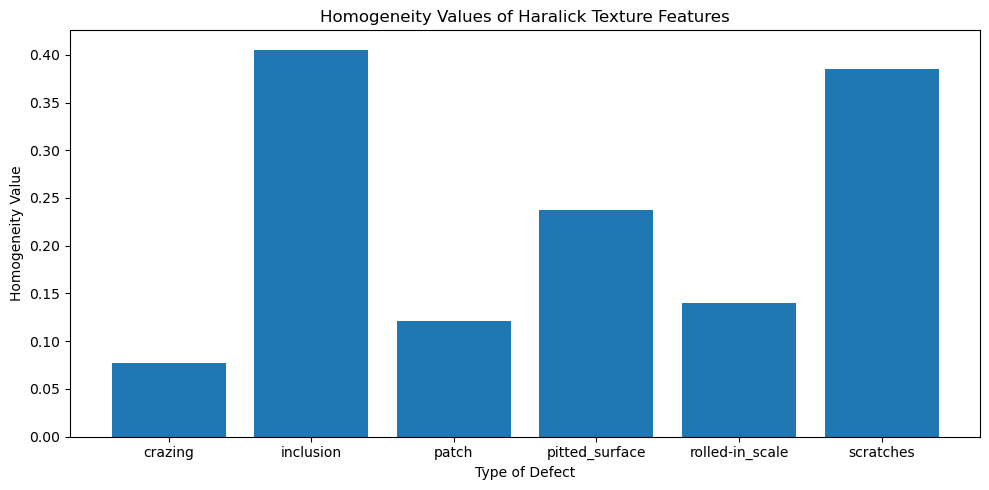

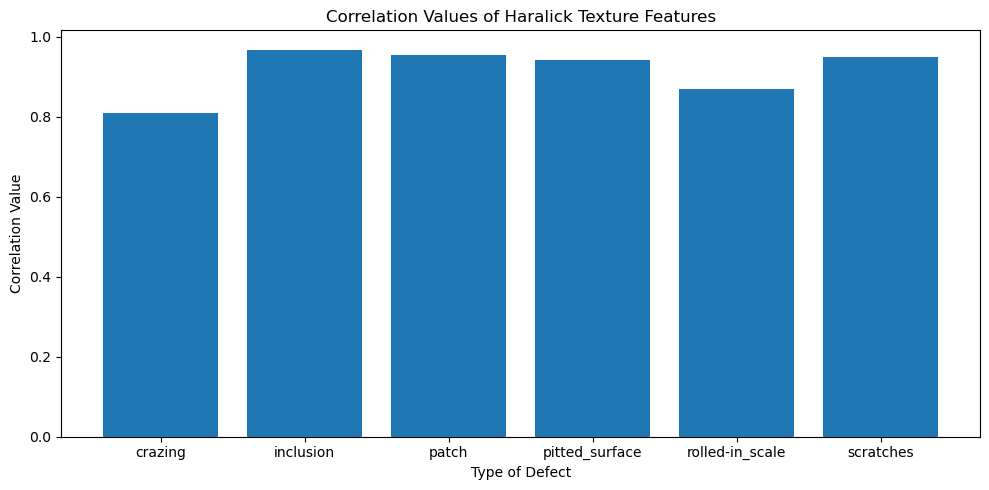

In [99]:
# Plot bar chart for Homogeneity values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_homogeneity_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Homogeneity Value')
plt.title('Homogeneity Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()

# Plot bar chart for Correlation values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_correlation_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Correlation Value')
plt.title('Correlation Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()
